# Step 1: Extract TS features

# Train

In [1]:
import os
import pandas as pd
from natsort import natsorted

partition_train = 'partition1' 

# For flare examples
folder_path = rf'C:\Users\user\Desktop\H01\DATA\{partition_train}\FL'
csv_files = natsorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
flare_data_list = []
# Loop through the sorted CSV files and load them into dataframes
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Use the file name (without extension) as the key in the dictionary
    df = pd.read_csv(file_path, sep='\t')
    first_24_features = df.iloc[:, 1:25]
    flare_data_list.append(first_24_features)
    
# For non-flare examples    
folder_path = rf'C:\Users\user\Desktop\H01\DATA\{partition_train}\NF'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv') and file.startswith('FQ')]
csv_files = natsorted(csv_files)
non_flare_data_list  = []
# Loop through the sorted CSV files and load them into dataframes
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Use the file name (without extension) as the key in the dictionary
    df = pd.read_csv(file_path, sep='\t')
    first_24_features = df.iloc[:, 1:25]
    non_flare_data_list.append(first_24_features) 

C:\Users\user\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\user\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# flare
nan_count = 0
indexes_with_nan = []
for index, df in enumerate(flare_data_list):
    if df.isna().any().any():
        if index not in indexes_with_nan:
            nan_count += 1
            indexes_with_nan.append(index)

print("Number of DataFrames with NaN values among flare examples: ", nan_count, "/", len(flare_data_list) )
print("Percentage of DataFrames with NaN values among flare examples: ", (nan_count / len(flare_data_list)) * 100)
print(" ", indexes_with_nan)

# non-flare
nan_count_non_flare = 0
indexes_with_nan_non_flare = []
for index, df in enumerate(non_flare_data_list):
    if df.isna().any().any():
        if index not in indexes_with_nan_non_flare:
            nan_count_non_flare += 1
            indexes_with_nan_non_flare.append(index)

# Calculate the percentage of DataFrames with NaN values among non-flare examples
percentage_with_nan_non_flare = (nan_count_non_flare / len(non_flare_data_list)) * 100

# Report the results
print("Percentage of DataFrames with NaN values among non-flare examples: ", nan_count_non_flare, "/", len(non_flare_data_list) )
print("Percentage of DataFrames with NaN values among non-flare examples: ", (nan_count_non_flare / len(non_flare_data_list)) * 100)
print("Indexes of DataFrames with NaN values among non-flare examples ", indexes_with_nan_non_flare)

flare_data_list = [df for index, df in enumerate(flare_data_list) if index not in indexes_with_nan]
non_flare_data_list = [df for index, df in enumerate(non_flare_data_list) if index not in indexes_with_nan_non_flare]
print(len(flare_data_list))
print(len(non_flare_data_list))

flare_data_list_train = flare_data_list
non_flare_data_list_train = non_flare_data_list

Number of DataFrames with NaN values among flare examples:  74 / 1254
Percentage of DataFrames with NaN values among flare examples:  5.901116427432217
  [43, 46, 47, 48, 49, 50, 51, 52, 54, 263, 264, 273, 346, 463, 472, 513, 525, 555, 659, 734, 737, 738, 739, 740, 741, 742, 743, 744, 745, 746, 747, 748, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 871, 877, 878, 886, 908, 909, 1016, 1042, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1088, 1164, 1219, 1220, 1221, 1222, 1223, 1224, 1225, 1226, 1227, 1228, 1229, 1230, 1231]
Percentage of DataFrames with NaN values among non-flare examples:  3811 / 60130
Percentage of DataFrames with NaN values among non-flare examples:  6.33793447530351
Indexes of DataFrames with NaN values among non-flare examples  [66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 178, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 2

In [3]:
import numpy as np
import pandas as pd

flare_labels_train = np.ones(len(flare_data_list_train))
non_flare_labels_train = np.zeros(len(non_flare_data_list_train))
# Combine examples
ts_data_list_train = flare_data_list_train + non_flare_data_list_train
ts_labels_train = np.concatenate([flare_labels_train, non_flare_labels_train])
# shuffle the data
permutation = np.random.permutation(len(ts_data_list_train))
ts_data_list_train = [ts_data_list_train[i] for i in permutation]
ts_labels_train = ts_labels_train[permutation]


# Extract the last column for every TS 
ts_data_list_train = np.array([ts.to_numpy() for ts in ts_data_list_train])
print(ts_data_list_train.shape)
ts_data_list_train_LAST = ts_data_list_train[:, -1, :]
print(ts_data_list_train_LAST.shape)

#print("ts_data_list_train[0]:", ts_data_list_train[0], " len ", len(ts_data_list_train))
#print("ts_data_list_train_LAST[0]:", ts_data_list_train_LAST[0], " len ", len(ts_data_list_train_LAST))

(57499, 60, 24)
(57499, 24)


# Test

In [22]:
import os
import pandas as pd
from natsort import natsorted

partition_test = 'partition2' 

# For flare examples
folder_path = rf'C:\Users\user\Desktop\H01\DATA\{partition_test}\FL'
csv_files = natsorted([file for file in os.listdir(folder_path) if file.endswith('.csv')])
flare_data_list = []
# Loop through the sorted CSV files and load them into dataframes
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Use the file name (without extension) as the key in the dictionary
    df = pd.read_csv(file_path, sep='\t')
    first_24_features = df.iloc[:, 1:25]
    flare_data_list.append(first_24_features)
    
# For non-flare examples    
folder_path = rf'C:\Users\user\Desktop\H01\DATA\{partition_test}\NF'
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]
csv_files = natsorted(csv_files)
non_flare_data_list  = []
# Loop through the sorted CSV files and load them into dataframes
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Use the file name (without extension) as the key in the dictionary
    df = pd.read_csv(file_path, sep='\t')
    first_24_features = df.iloc[:, 1:25]
    non_flare_data_list.append(first_24_features)  

In [23]:
# flare
nan_count = 0
indexes_with_nan = []
for index, df in enumerate(flare_data_list):
    if df.isna().any().any():
        if index not in indexes_with_nan:
            nan_count += 1
            indexes_with_nan.append(index)

print("Number of DataFrames with NaN values among flare examples: ", nan_count, "/", len(flare_data_list) )
print("Percentage of DataFrames with NaN values among flare examples: ", (nan_count / len(flare_data_list)) * 100)
print(" ", indexes_with_nan)

# non-flare
nan_count_non_flare = 0
indexes_with_nan_non_flare = []
for index, df in enumerate(non_flare_data_list):
    if df.isna().any().any():
        if index not in indexes_with_nan_non_flare:
            nan_count_non_flare += 1
            indexes_with_nan_non_flare.append(index)

# Calculate the percentage of DataFrames with NaN values among non-flare examples
percentage_with_nan_non_flare = (nan_count_non_flare / len(non_flare_data_list)) * 100

# Report the results
print("Percentage of DataFrames with NaN values among non-flare examples: ", nan_count_non_flare, "/", len(non_flare_data_list) )
print("Percentage of DataFrames with NaN values among non-flare examples: ", (nan_count_non_flare / len(non_flare_data_list)) * 100)
print("Indexes of DataFrames with NaN values among non-flare examples ", indexes_with_nan_non_flare)

flare_data_list = [df for index, df in enumerate(flare_data_list) if index not in indexes_with_nan]
non_flare_data_list = [df for index, df in enumerate(non_flare_data_list) if index not in indexes_with_nan_non_flare]
print(len(flare_data_list))
print(len(non_flare_data_list))

flare_data_list_test = flare_data_list
non_flare_data_list_test = non_flare_data_list

Number of DataFrames with NaN values among flare examples:  116 / 1401
Percentage of DataFrames with NaN values among flare examples:  8.279800142755175
  [0, 1, 2, 3, 4, 5, 6, 7, 8, 133, 214, 255, 264, 266, 304, 305, 313, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 363, 364, 365, 366, 367, 368, 369, 370, 525, 548, 549, 634, 635, 636, 637, 638, 639, 640, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 713, 768, 769, 773, 834, 855, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1176, 1189, 1190, 1191, 1192, 1193, 1194, 1195, 1196, 1197, 1198, 1199, 1200, 1227, 1228, 1229, 1230, 1231, 1232, 1233, 1320, 1324, 1325, 1326, 1327, 1328, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366]
Percentage of DataFrames with NaN values among non-flare examples:  8900 / 87156
Percentage of DataFrames with NaN values among non-flare examples:  10.211574647758043
Indexes of DataFrames with NaN values among non-flare examples 

In [24]:
import numpy as np
import pandas as pd

flare_labels_test = np.ones(len(flare_data_list_test))
non_flare_labels_test = np.zeros(len(non_flare_data_list_test))
# Combine examples
ts_data_list_test = flare_data_list_test + non_flare_data_list_test
ts_labels_test = np.concatenate([flare_labels_test, non_flare_labels_test])
# shuffle the data
permutation = np.random.permutation(len(ts_data_list_test))
ts_data_list_test = [ts_data_list_test[i] for i in permutation]
ts_labels_test = ts_labels_test[permutation]

# Convert df objects to np array format
ts_data_list_test = np.array([ts.to_numpy() for ts in ts_data_list_test])
print(ts_data_list_test.shape)
# Extract the last column for every TS 
ts_data_list_test_LAST = ts_data_list_test[:, -1, :]
print(ts_data_list_test_LAST.shape)

print(ts_labels_test.shape)

(79541, 60, 24)
(79541, 24)
(79541,)


# M1: TS Last Instance - Traditional Classifiers

# Train

In [25]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle
import os

# Create and train an SVM classifier
svm_classifier = SVC(class_weight='balanced')
svm_classifier.fit(ts_data_list_train_LAST, ts_labels_train)

# Make predictions on the test data
y_pred = svm_classifier.predict(ts_data_list_train_LAST)  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_train, y_pred)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# Define the directory where you want to save the model
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)
# Save the trained SVM classifier model to a file in the specified directory
model_filename = os.path.join(model_directory, 'svm_classifier_model_tsLAST.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(svm_classifier, model_file)
print(f"Saved SVM classifier model to {model_filename}")

Accuracy: 0.9342075514356771
True Skill Statistics (TSS): 0.9013004010748698
Heidke Skill Score 1 (HSS1): -2.2059322033898305
Heidke Skill Score 2 (HSS2): 0.35514301514865804
F1 Score: 0.3764628317125433
Gilbert Skill Score: 0.01942916629267286
ROC AUC Score: 0.9506502005374349
Saved SVM classifier model to C:\Users\user\Desktop\H01\MODELS\svm_classifier_model_tsLAST.pkl


In [27]:
import pickle
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(ts_data_list_train_LAST, ts_labels_train)

# Make predictions on the test data
y_pred = knn.predict(ts_data_list_train_LAST)  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_train, y_pred)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

model_directory = r'C:\Users\user\Desktop\H01\MODELS'
os.makedirs(model_directory, exist_ok=True)

model_filename = os.path.join(model_directory, 'kNN_model_tsLAST.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(knn, model_file)

print(f"Saved kNN classifier model to {model_filename}")

Accuracy: 0.9969390772013427
True Skill Statistics (TSS): 0.8956513456487725
Heidke Skill Score 1 (HSS1): 0.8508474576271186
Heidke Skill Score 2 (HSS2): 0.9216509867331755
F1 Score: 0.9232111692844677
Gilbert Skill Score: 0.01806590205335038
ROC AUC Score: 0.9478256728243861
Saved kNN classifier model to C:\Users\user\Desktop\H01\MODELS\kNN_model_tsLAST.pkl


In [28]:
import pickle
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(ts_data_list_train_LAST, ts_labels_train)

# Make predictions on the test data
y_pred = dt.predict(ts_data_list_train_LAST)  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_train, y_pred)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

model_directory = r'C:\Users\user\Desktop\H01\MODELS'
os.makedirs(model_directory, exist_ok=True)

model_filename = os.path.join(model_directory, 'dt_model_tsLAST.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(dt, model_file)

print(f"Saved DT classifier model to {model_filename}")

Accuracy: 1.0
True Skill Statistics (TSS): 1.0
Heidke Skill Score 1 (HSS1): 1.0
Heidke Skill Score 2 (HSS2): 1.0
F1 Score: 1.0
Gilbert Skill Score: 0.020109408817464508
ROC AUC Score: 1.0
Saved DT classifier model to C:\Users\user\Desktop\H01\MODELS\dt_model_tsLAST.pkl


In [39]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\tsf_classifier_model.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test_LAST)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_test, predictions)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("TSFC Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

DT Model Evaluation Metrics:
Accuracy: 0.9757357840610503
True Skill Statistics (TSS): 0.31247363735663136
Heidke Skill Score 1 (HSS1): -0.5019455252918288
Heidke Skill Score 2 (HSS2): 0.29046301175636635
F1 Score: 0.3027456647398844
Gilbert Skill Score: 0.005091595750999409
ROC AUC Score: 0.6562368186783157


In [31]:
import pickle
import os
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

lr = LogisticRegression(max_iter=10000)
lr.fit(ts_data_list_train_LAST, ts_labels_train)

# Make predictions on the test data
y_pred = lr.predict(ts_data_list_train_LAST)  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_train, y_pred)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

model_directory = r'C:\Users\user\Desktop\H01\MODELS'
os.makedirs(model_directory, exist_ok=True)

model_filename = os.path.join(model_directory, 'lr_model_tsLAST.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(lr, model_file)

print(f"Saved LR classifier model to {model_filename}")

Accuracy: 0.9794779039635472
True Skill Statistics (TSS): 0.0
Heidke Skill Score 1 (HSS1): nan
Heidke Skill Score 2 (HSS2): 0.0
F1 Score: 0.0
Gilbert Skill Score: 0.0
ROC AUC Score: 0.5
Saved LR classifier model to C:\Users\user\Desktop\H01\MODELS\lr_model_tsLAST.pkl


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\user\AppData\Local\Temp\ipykernel_8936\2665313812.py:25: RuntimeWarning: invalid value encountered in scalar divide
  hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )


In [30]:
import pickle
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=1000)  
mlp.fit(ts_data_list_train_LAST, ts_labels_train)

# Make predictions on the test data
y_pred = mlp.predict(ts_data_list_train_LAST)  

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_train, y_pred)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_train, y_pred)

# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

model_directory = r'C:\Users\user\Desktop\H01\MODELS'
os.makedirs(model_directory, exist_ok=True)

model_filename = os.path.join(model_directory, 'mlp_model_tsLAST.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(mlp, model_file)

print(f"Saved MLP classifier model to {model_filename}")

Accuracy: 0.9814953303535714
True Skill Statistics (TSS): 0.11655852060643652
Heidke Skill Score 1 (HSS1): 0.0983050847457627
Heidke Skill Score 2 (HSS2): 0.20205960371488277
F1 Score: 0.20597014925373136
Gilbert Skill Score: 0.0023872473331303778
ROC AUC Score: 0.5582792603032183
Saved MLP classifier model to C:\Users\user\Desktop\H01\MODELS\mlp_model_tsLAST.pkl


# Test

In [32]:
import os
import pickle
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import numpy as np

# Load the saved SVM model
svm_model_path = r'C:\Users\user\Desktop\H01\MODELS\svm_classifier_model_tsLAST.pkl'
with open(svm_model_path, 'rb') as svm_model_file:
    svm_classifier = pickle.load(svm_model_file)

# Make predictions using the loaded models
svm_predictions = svm_classifier.predict(ts_data_list_test_LAST)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, svm_predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_test, svm_predictions)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_test, svm_predictions)

# Print the results
print("SVM Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

SVM Model Evaluation Metrics:
Accuracy: 0.8598961541846344
True Skill Statistics (TSS): 0.6027068796256445
Heidke Skill Score 1 (HSS1): -7.6723735408560305
Heidke Skill Score 2 (HSS2): 0.12029847266101168
F1 Score: 0.1459227467811159
Gilbert Skill Score: 0.011171388120881623
ROC AUC Score: 0.8013534398128223


In [33]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\kNN_model_tsLAST.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test_LAST)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_test, predictions)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("kNN Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

kNN Model Evaluation Metrics:
Accuracy: 0.9639556958046793
True Skill Statistics (TSS): 0.3081544299980827
Heidke Skill Score 1 (HSS1): -1.2311284046692608
Heidke Skill Score 2 (HSS2): 0.21369388619400234
F1 Score: 0.2303355704697987
Gilbert Skill Score: 0.0050836231975590505
ROC AUC Score: 0.6540772149990414


In [34]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\mlp_model_tsLAST.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test_LAST)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_test, predictions)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("MLP Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

MLP Model Evaluation Metrics:
Accuracy: 0.9808777862988899
True Skill Statistics (TSS): 0.014589182306579143
Heidke Skill Score 1 (HSS1): -0.18365758754863812
Heidke Skill Score 2 (HSS2): 0.023678506683966986
F1 Score: 0.02935545628589662
Gilbert Skill Score: 0.0002364177565910881
ROC AUC Score: 0.5072945911532896


In [35]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\lr_model_tsLAST.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test_LAST)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_test, predictions)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("LR Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

LR Model Evaluation Metrics:
Accuracy: 0.9838448095950516
True Skill Statistics (TSS): 0.0
Heidke Skill Score 1 (HSS1): nan
Heidke Skill Score 2 (HSS2): 0.0
F1 Score: 0.0
Gilbert Skill Score: 0.0
ROC AUC Score: 0.5


C:\Users\user\AppData\Local\Temp\ipykernel_8936\4282264664.py:20: RuntimeWarning: invalid value encountered in scalar divide
  hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )


In [36]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\dt_model_tsLAST.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test_LAST)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)

# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate Accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(ts_labels_test, predictions)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))

# Calculate ROC AUC score
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("DT Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

DT Model Evaluation Metrics:
Accuracy: 0.9594423001973825
True Skill Statistics (TSS): 0.5431469955536532
Heidke Skill Score 1 (HSS1): -1.5105058365758752
Heidke Skill Score 2 (HSS2): 0.2985945500257957
F1 Score: 0.3150743099787686
Gilbert Skill Score: 0.009004346420774204
ROC AUC Score: 0.7715734977768266


# M2: TS Classification

# Train

# ST

In [42]:
from sktime.classification.shapelet_based import ShapeletTransformClassifier
from sktime.classification.sklearn import RotationForest
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle
import os

# Create and train classifier
classifier = ShapeletTransformClassifier(
    estimator=RotationForest(n_estimators=3),
    n_shapelet_samples=100,
    max_shapelets=10,
    batch_size=20,
)
classifier.fit(ts_data_list_train, ts_labels_train)

# Make predictions on the test data
y_pred = classifier.predict(ts_data_list_train)  
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_train, y_pred)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_train, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# Define the directory where you want to save the model
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)
# Save the trained SVM classifier model to a file in the specified directory
model_filename = os.path.join(model_directory, 'st_classifier_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)
print(f"Saved ST classifier model to {model_filename}")

Accuracy: 0.9985564966347241
True Skill Statistics (TSS): 0.951233259329949
Heidke Skill Score 1 (HSS1): 0.9296610169491526
Heidke Skill Score 2 (HSS2): 0.9636258493683375
F1 Score: 0.9643623872906827
Gilbert Skill Score: 0.019156190129554534
ROC AUC Score: 0.9756166296649745
Saved ST classifier model to C:\Users\user\Desktop\H01\MODELS\st_classifier_model.pkl


In [43]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\st_classifier_model.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_test, predictions)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("ST Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

ST Model Evaluation Metrics:
Accuracy: 0.9634528105002451
True Skill Statistics (TSS): 0.041273109825320384
Heidke Skill Score 1 (HSS1): -1.2622568093385214
Heidke Skill Score 2 (HSS2): 0.03465488690144611
F1 Score: 0.05278592375366569
Gilbert Skill Score: 0.0006811437673423572
ROC AUC Score: 0.5206365549126603


# TSFC

In [44]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle
import os

# FOR TSFC to work, we need to concatinate each 24 univariate ts 
# Treat like a single big TS
ts_data_list_train_concatenated = ts_data_list_train.reshape((len(ts_data_list_train), -1))

# Create and train classifier
classifier = TimeSeriesForestClassifier(n_estimators=100, random_state=42)
classifier.fit(ts_data_list_train_concatenated, ts_labels_train)

# Make predictions on the test data
y_pred = classifier.predict(ts_data_list_train_concatenated)  
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_train, y_pred)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_train, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# Define the directory where you want to save the model
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)
# Save the trained SVM classifier model to a file in the specified directory
model_filename = os.path.join(model_directory, 'tsf_classifier_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)
print(f"Saved TSF classifier model to {model_filename}")

Accuracy: 1.0
True Skill Statistics (TSS): 1.0
Heidke Skill Score 1 (HSS1): 1.0
Heidke Skill Score 2 (HSS2): 1.0
F1 Score: 1.0
Gilbert Skill Score: 0.020109408817464508
ROC AUC Score: 1.0
Saved TSF classifier model to C:\Users\user\Desktop\H01\MODELS\tsf_classifier_model.pkl


In [45]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\tsf_classifier_model.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)

# FOR TSFC to work, we need to concatinate each 24 univariate ts     
ts_data_list_test_concatenated = ts_data_list_test.reshape((len(ts_data_list_test), -1))    

predictions = classifier.predict(ts_data_list_test_concatenated)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_test, predictions)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("TSFC Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

TSFC Model Evaluation Metrics:
Accuracy: 0.9755597742044984
True Skill Statistics (TSS): 0.290097222564752
Heidke Skill Score 1 (HSS1): -0.5128404669260701
Heidke Skill Score 2 (HSS2): 0.2739510338319801
F1 Score: 0.2863436123348017
Gilbert Skill Score: 0.004727793465341441
ROC AUC Score: 0.645048611282376


# ROCKET

In [26]:
from sktime.classification.kernel_based import RocketClassifier
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle
import os

# Create and train classifier
classifier = RocketClassifier(num_kernels=500)
classifier.fit(ts_data_list_train, ts_labels_train)

# Make predictions on the test data
y_pred = classifier.predict(ts_data_list_train)  
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_train, y_pred)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_train, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# Define the directory where you want to save the model
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)
# Save the trained SVM classifier model to a file in the specified directory
model_filename = os.path.join(model_directory, 'rocket_classifier_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)
print(f"Saved Rocket classifier model to {model_filename}")

Accuracy: 0.9824866519417729
True Skill Statistics (TSS): 0.14826957275158667
Heidke Skill Score 1 (HSS1): 0.14661016949152542
Heidke Skill Score 2 (HSS2): 0.253927721221703
F1 Score: 0.25792188651437
Gilbert Skill Score: 0.0030336792567345074
ROC AUC Score: 0.5741347863757934
Saved Rocket classifier model to C:\Users\user\Desktop\H01\MODELS\rocket_classifier_model.pkl


In [27]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\rocket_classifier_model.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_test, predictions)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("ROCKET Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

ROCKET Model Evaluation Metrics:
Accuracy: 0.9817578355816498
True Skill Statistics (TSS): 0.01165652468959504
Heidke Skill Score 1 (HSS1): -0.1291828793774319
Heidke Skill Score 2 (HSS2): 0.01990802739580361
F1 Score: 0.0242098184263618
Gilbert Skill Score: 0.00018872157001467076
ROC AUC Score: 0.5058282623447975


# TimeSeriesSVC

In [46]:
from sktime.classification.kernel_based import TimeSeriesSVC
from sklearn.gaussian_process.kernels import RBF
from sktime.dists_kernels import AggrDist
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score
import pickle
import os

# Create and train classifier
mean_gaussian_tskernel = AggrDist(RBF())
classifier = TimeSeriesSVC(kernel=mean_gaussian_tskernel)
classifier.fit(ts_data_list_train, ts_labels_train)

# Make predictions on the test data
y_pred = classifier.predict(ts_data_list_train)  
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_train, y_pred)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_train, y_pred)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_train, y_pred)
# Print the results
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# Define the directory where you want to save the model
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
# Create the directory if it doesn't exist
os.makedirs(model_directory, exist_ok=True)
# Save the trained classifier model to a file in the specified directory
model_filename = os.path.join(model_directory, 'tssvmc_classifier_model.pkl')
with open(model_filename, 'wb') as model_file:
    pickle.dump(classifier, model_file)
print(f"Saved TS-SVMC classifier model to {model_filename}")

KeyboardInterrupt: 

In [ ]:
model_path = r'C:\Users\user\Desktop\H01\MODELS\tssvmc_classifier_model.pkl'
with open(model_path, 'rb') as model_file:
    classifier = pickle.load(model_file)
    
predictions = classifier.predict(ts_data_list_test)
# Calculate the confusion matrix
conf_matrix = confusion_matrix(ts_labels_test, predictions)
# Calculate True Positives, True Negatives, False Positives, and False Negatives
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate metrics
accuracy = (tp + tn) / (tp + tn + fp + fn)
tss = (tp / (tp + fn)) - (fp / (fp + tn))
hss1 = (tp / (tp + fn) )*(2 - (tp + fp)/tp )
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))
f1 = f1_score(ts_labels_test, predictions)
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn))
roc_auc = roc_auc_score(ts_labels_test, predictions)

# Print the results
print("TS-SVMC Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

# LSTM

In [29]:
import torch
from torch.utils.data import Dataset, DataLoader
from torch_geometric.data import Data

# Assuming you have ts_data_list_train, ts_labels_train, ts_data_list_test, ts_labels_test

class TimeSeriesDataset(Dataset):
    def __init__(self, data_list, labels):
        self.data_list = data_list
        self.labels = labels

    def __len__(self):
        return len(self.data_list)

    def __getitem__(self, index):
        data = torch.Tensor(self.data_list[index])  # Assuming your data is already in tensor format
        label = torch.Tensor([self.labels[index]])
        return {'x': data, 'y': label}

# Create datasets and loaders
train_dataset = TimeSeriesDataset(ts_data_list_train, ts_labels_train)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

test_dataset = TimeSeriesDataset(ts_data_list_test, ts_labels_test)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score

# Assuming you have train_loader and test_loader already defined

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1, :, :])
        return torch.sigmoid(out)

# Initialize LSTM model
input_size = 24  # Assuming each time step has 24 features
hidden_size = 64
num_layers = 2
output_size = 1  # Binary classification

lstm_model = LSTMModel(input_size, hidden_size, num_layers, output_size)

# Initialize LSTM model, loss function, and optimizer
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
#lstm_model = LSTMModel(input_size=24, hidden_size=64, output_size=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(lstm_model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    lstm_model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        data, labels = batch['x'], batch['y']
        optimizer.zero_grad()
        output = lstm_model(data)
        loss = criterion(output, labels.view(-1, 1))
        loss.backward()
        optimizer.step()

        # Update metrics
        total_loss += loss.item()
        total_samples += len(labels) 
        predicted_labels = (output >= 0.5).float()
        correct_predictions += (predicted_labels == labels.view(-1, 1)).sum().item()

    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples
    train_losses.append(average_loss)
    train_accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/10: 100%|██████████| 899/899 [00:13<00:00, 68.85it/s]


Epoch 1/10, Loss: 0.0025, Accuracy: 0.9793


Epoch 2/10: 100%|██████████| 899/899 [00:12<00:00, 70.63it/s]


Epoch 2/10, Loss: 0.0014, Accuracy: 0.9799


Epoch 3/10: 100%|██████████| 899/899 [00:12<00:00, 69.50it/s]


Epoch 3/10, Loss: 0.0013, Accuracy: 0.9803


Epoch 4/10: 100%|██████████| 899/899 [00:12<00:00, 70.60it/s]


Epoch 4/10, Loss: 0.0012, Accuracy: 0.9806


Epoch 5/10: 100%|██████████| 899/899 [00:12<00:00, 70.10it/s]


Epoch 5/10, Loss: 0.0012, Accuracy: 0.9807


Epoch 6/10: 100%|██████████| 899/899 [00:13<00:00, 68.42it/s]


Epoch 6/10, Loss: 0.0012, Accuracy: 0.9809


Epoch 7/10: 100%|██████████| 899/899 [00:12<00:00, 70.01it/s]


Epoch 7/10, Loss: 0.0012, Accuracy: 0.9810


Epoch 8/10: 100%|██████████| 899/899 [00:12<00:00, 69.20it/s]


Epoch 8/10, Loss: 0.0012, Accuracy: 0.9811


Epoch 9/10: 100%|██████████| 899/899 [00:12<00:00, 69.30it/s]


Epoch 9/10, Loss: 0.0012, Accuracy: 0.9813


Epoch 10/10: 100%|██████████| 899/899 [00:13<00:00, 69.12it/s]

Epoch 10/10, Loss: 0.0012, Accuracy: 0.9813


In [31]:
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
model_filename = 'lstm_model_TS.pth'
model_path = os.path.join(model_directory, model_filename)

torch.save(lstm_model.state_dict(), model_path)
print(f"Saved LSTM model to {model_path}")

Saved LSTM model to C:\Users\user\Desktop\H01\MODELS\lstm_model_TS.pth


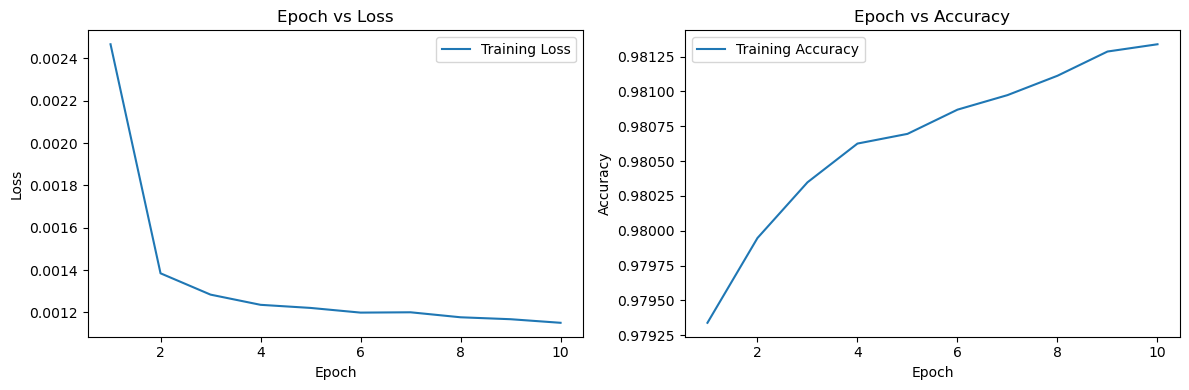

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [33]:
# Evaluate on the test set
lstm_model.eval()
true_labels, predicted_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing'):
        data, labels = batch['x'], batch['y']
        output = (lstm_model(data) >= 0.5).float()
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(output.cpu().numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn)) * (2 - (tp + fp) / tp)

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (
        tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)
)

# Calculate ROC AUC score
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Print the results
print("GCN Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

Testing: 100%|██████████| 1243/1243 [00:06<00:00, 179.65it/s]


GCN Model Evaluation Metrics:
Accuracy: 0.9820469946316994
True Skill Statistics (TSS): 0.007357842602986347
Heidke Skill Score 1 (HSS1): -0.111284046692607
Heidke Skill Score 2 (HSS2): 0.012860578475302106
F1 Score: 0.01652892561983471
Gilbert Skill Score: 0.00011908906961421204
ROC AUC Score: 0.5036789213014932


# RNN

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm
from sklearn.metrics import accuracy_score
  
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        _, hidden = self.rnn(x)
        out = self.fc(hidden[-1, :, :])  # Take the hidden state of the last time step
        out = self.sigmoid(out)
        return out

# Hyperparameters
input_size = 24  # Number of features
hidden_size = 64  # Number of hidden units
output_size = 1  # Output size (1 for binary classification)

# Create an instance of the RNN model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
rnn_model = RNN(input_size=input_size, hidden_size=hidden_size, output_size=output_size).to(device)   
criterion = nn.BCELoss()
optimizer = optim.Adam(rnn_model.parameters(), lr=0.0001)

# Training loop
num_epochs = 10
train_losses = []
train_accuracies = []

for epoch in range(num_epochs):
    rnn_model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0

    for batch in tqdm(train_loader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
        data, labels = batch['x'], batch['y']
        optimizer.zero_grad()
        output = rnn_model(data)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        # Update metrics
        total_loss += loss.item()
        total_samples += labels.size(0)
        predicted_labels = (output >= 0.5).float()
        correct_predictions += (predicted_labels == labels).sum().item()

    average_loss = total_loss / total_samples
    accuracy = correct_predictions / total_samples

    train_losses.append(average_loss)
    train_accuracies.append(accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')

Epoch 1/10: 100%|██████████| 899/899 [00:08<00:00, 101.10it/s]


Epoch 1/10, Loss: 0.0023, Accuracy: 0.9796


Epoch 2/10: 100%|██████████| 899/899 [00:08<00:00, 104.29it/s]


Epoch 2/10, Loss: 0.0015, Accuracy: 0.9796


Epoch 3/10: 100%|██████████| 899/899 [00:08<00:00, 106.55it/s]


Epoch 3/10, Loss: 0.0015, Accuracy: 0.9796


Epoch 4/10: 100%|██████████| 899/899 [00:08<00:00, 104.11it/s]


Epoch 4/10, Loss: 0.0014, Accuracy: 0.9796


Epoch 5/10: 100%|██████████| 899/899 [00:08<00:00, 104.18it/s]


Epoch 5/10, Loss: 0.0014, Accuracy: 0.9796


Epoch 6/10: 100%|██████████| 899/899 [00:08<00:00, 101.87it/s]


Epoch 6/10, Loss: 0.0014, Accuracy: 0.9796


Epoch 7/10: 100%|██████████| 899/899 [00:08<00:00, 102.59it/s]


Epoch 7/10, Loss: 0.0014, Accuracy: 0.9797


Epoch 8/10: 100%|██████████| 899/899 [00:08<00:00, 102.38it/s]


Epoch 8/10, Loss: 0.0014, Accuracy: 0.9797


Epoch 9/10: 100%|██████████| 899/899 [00:08<00:00, 104.06it/s]


Epoch 9/10, Loss: 0.0014, Accuracy: 0.9797


Epoch 10/10: 100%|██████████| 899/899 [00:08<00:00, 102.31it/s]

Epoch 10/10, Loss: 0.0014, Accuracy: 0.9798


In [36]:
model_directory = r'C:\Users\user\Desktop\H01\MODELS'
model_filename = 'rnn_model_TS.pth'
model_path = os.path.join(model_directory, model_filename)

torch.save(rnn_model.state_dict(), model_path)
print(f"Saved RNN model to {model_path}")

Saved RNN model to C:\Users\user\Desktop\H01\MODELS\rnn_model_TS.pth


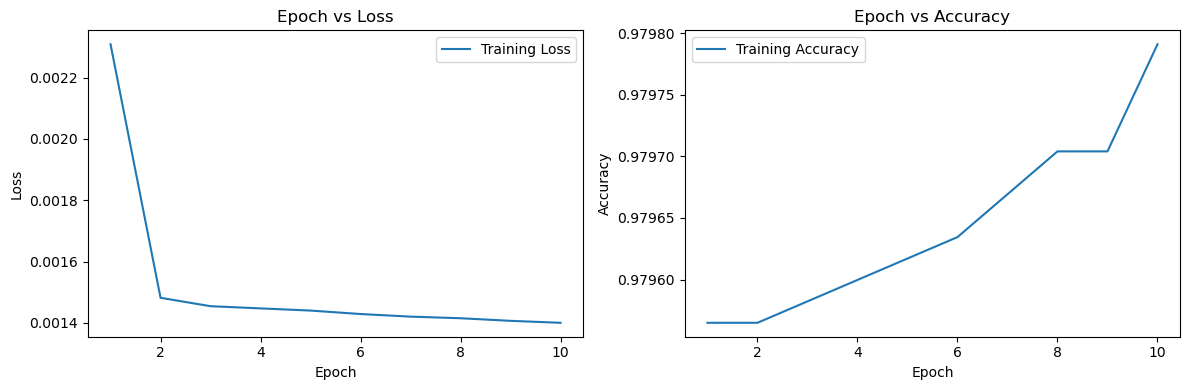

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epoch vs Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_accuracies) + 1), train_accuracies, label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [38]:
# Evaluate on the test set
rnn_model.eval()
true_labels, predicted_labels = [], []

with torch.no_grad():
    for batch in tqdm(test_loader, desc='Testing'):
        data, labels = batch['x'], batch['y']
        output = (rnn_model(data) >= 0.5).float()
        true_labels.extend(labels.cpu().numpy())
        predicted_labels.extend(output.cpu().numpy())

true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Extract values from confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Calculate accuracy
accuracy = accuracy_score(true_labels, predicted_labels)

# Calculate True Skill Statistics (TSS)
tss = (tp / (tp + fn)) - (fp / (fp + tn))

# Calculate Heidke Skill Score 1 (HSS1)
hss1 = (tp / (tp + fn)) * (2 - (tp + fp) / tp)

# Calculate Heidke Skill Score 2 (HSS2)
hss2 = (2 * (tp * tn - fp * fn)) / ((tp + fn) * (tn + fn) + (tp + fp) * (tn + fp))

# Calculate F1 Score
f1 = f1_score(true_labels, predicted_labels)

# Calculate Gilbert Skill Score
gilbert = (tp - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)) / (
        tp + tn - (tp + fn) * (tp + fp) / (tp + tn + fp + fn)
)

# Calculate ROC AUC score
roc_auc = roc_auc_score(true_labels, predicted_labels)

# Print the results
print("GCN Model Evaluation Metrics:")
print("Accuracy:", accuracy)
print("True Skill Statistics (TSS):", tss)
print("Heidke Skill Score 1 (HSS1):", hss1)
print("Heidke Skill Score 2 (HSS2):", hss2)
print("F1 Score:", f1)
print("Gilbert Skill Score:", gilbert)
print("ROC AUC Score:", roc_auc)

Testing: 100%|██████████| 1243/1243 [00:04<00:00, 278.35it/s]


GCN Model Evaluation Metrics:
Accuracy: 0.9834927898819477
True Skill Statistics (TSS): 0.0034693576783212557
Heidke Skill Score 1 (HSS1): -0.02178988326848249
Heidke Skill Score 2 (HSS2): 0.006636699949150181
F1 Score: 0.007558578987150415
Gilbert Skill Score: 5.606863507940928e-05
ROC AUC Score: 0.5017346788391606


In [41]:
!pip install numpy==1.25

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/15.1 MB ? eta -:--:--
    --------------------------------------- 0.2/15.1 MB 6.7 MB/s eta 0:00:03
   - -------------------------------------- 0.7/15.1 MB 9.1 MB/s eta 0:00:02
   -- ------------------------------------- 1.1/15.1 MB 8.9 MB/s eta 0:00:02
   --- ------------------------------------ 1.4/15.1 MB 10.0 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.1 MB 9.7 MB/s eta 0:00:02
   ----- ---------------------------------- 2.1/15.1 MB 9.7 MB/s eta 0:00:02
   -------- ------------------------------- 3.0/15.1 MB 9.6 MB/s eta 0:00:02
   --------- ------------------------------ 3.6/15.1 MB 10.1 MB/s eta 0:00:02
   ---------- ----------------------------- 4.1/15.1 MB 10.1 MB/s eta 0:00:02
   ----------- ---------------------------- 4.3/15.1 MB 9.8 MB/s eta 0:00:02
   ------------ --------------------------- 4.8/15.1 MB 9.6 MB/s eta 0:00:02
   ----

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.9.1 requires libclang>=13.0.0, which is not installed.
tensorflow 2.9.1 requires tensorflow-io-gcs-filesystem>=0.23.1, which is not installed.
tensorflow 2.9.1 requires flatbuffers<2,>=1.12, but you have flatbuffers 23.5.26 which is incompatible.
tensorflow 2.9.1 requires gast<=0.4.0,>=0.2.1, but you have gast 0.5.4 which is incompatible.
tensorflow 2.9.1 requires protobuf<3.20,>=3.9.2, but you have protobuf 3.20.3 which is incompatible.
